Osnabrück University - Machine Learning (Summer Term 2016) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 06

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, May 29, 2016**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's studip folder.

## Assignment 1: Self-organizing maps

## Assignment 2: Hebbian Learning

## Assignment 3: Local PCA

In the lecture we learned that regular PCA is ill suited for special cases of data. In this assignment we will take a look at local PCA which is used for clustered data (ML-06, Slide 25). This is mostly a repetition of algorithms we already used. Feel free to use the built-in functions for k-means clustering and PCA from the libraries (we already included the right imports to set you on track).

<IPython.core.display.Javascript object>


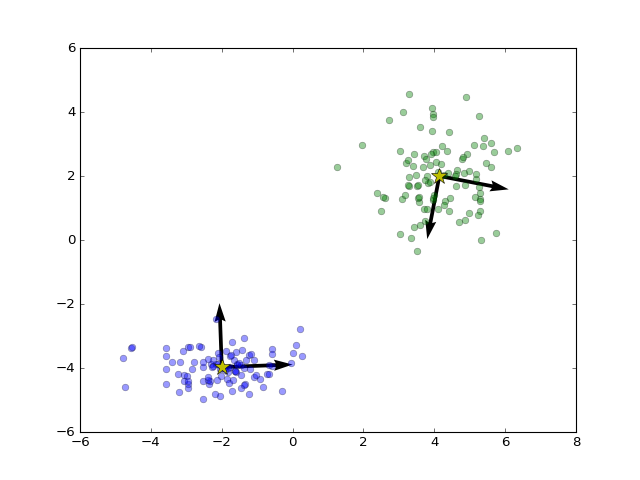

In [128]:
%matplotlib notebook

import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

from numpy.random import multivariate_normal as multNorm

from scipy.cluster.vq import kmeans, vq
from sklearn.decomposition.pca import PCA

# Generate clustered data - you may plot the data to take a look at it
data = np.vstack((multNorm([4,2],[[1, 0], [0, 1]],100), multNorm([-2,-4],[[1, 0], [0, 0.3]],100)))
# Look at the data.
# plt.figure('Data')
# plt.scatter(*zip(*data))

# TODO: Apply k-means to the data.

# Compute k-means with K = 2 (2 clusters).
centroids, _ = kmeans(data,2)

# Assign each sample to a cluster.
idx, _ = vq(data, centroids)

# Todo: Apply PCA for each cluster and store each two largest components.
pcs = np.empty([np.unique(idx).size, 2, 2])
for idxU in np.unique(idx):
    pca = PCA(2)
    pca.fit(data[idx==idxU])
    pcs[idxU] = pca.components_

# TODO: Plot the results of k-means and local PCA
fig = plt.figure('Local PCA')
# make cluster centroids the same format as the PCs
cls = np.tile(centroids[np.newaxis], (pcs.shape[0], 1, 1))

# plot data, clusters, pPCs
for i, idxU in enumerate(np.unique(idx)):
    plt.plot(*zip(*data[idx==idxU]), 'o', alpha=0.4)
    plt.quiver(*cls[:,i,:].T, *pcs[i,:,:].T, scale_units='xy', scale=0.5)

plt.plot(centroids[:,0], centroids[:,1], '*y', markeredgewidth=0.5, markersize=15)

fig.canvas.draw()